In [23]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas 

### TClab data:

In [24]:
df = pandas.read_csv('Step1.csv')
ydata = df.T1.values
udata = df.Q1.values
# white noise:
ϵ = numpy.random.normal(size=1001)

### In statsmodels, statsmodels.tsa.ARMA() can be used to predict the parameters:

In [68]:
# The order is chosen as (2,1) because it does not converge if the order 
# of the moving average model is higher than 1

ARMA_results = sm.tsa.ARMA(ydata, order=(2,1), exog = udata).fit() #  "exog = u" turns this AMRA into an ARMAX model 
                                                                    #  by giving it the exogenous inputs
ARMA_results.summary()

C:\Users\annam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1001
Model:                     ARMA(2, 1)   Log Likelihood                 527.110
Method:                       css-mle   S.D. of innovations              0.142
Date:                Tue, 29 Jan 2019   AIC                          -1042.220
Time:                        21:06:33   BIC                          -1012.767
Sample:                             0   HQIC                         -1031.026
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6835      0.587     36.956      0.000      20.533      22.833
x1          1.722e-06      0.003      0.001      0.999      -0.005       0.005
ar.L1.y        0.5961   8.28e-06    7.2e+04      0.000       0.596       0.596
ar.L2.y        0.4039   5.61e-06    7.2e+04      0.000       0.404       0.404
ma.L1.y        0.0975      0.030      3.242      0.001       0.039       0.156
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2           -2.4758           +0.0000j            2.4758            0.5000
MA.1          -10.2580           +0.0000j           10.2580            0.5000
-----------------------------------------------------------------------------
"""

In [75]:
const, x1, ar1, ar2, ma, = ARMA_results.params

### The following difference equation was derived using the results from the summary above:


$y(t) = ma_1\epsilon(t-1) + ma_q\epsilon(t-q) + \epsilon(t) + ar_1y(t-1) + ar_py(t-p) +  x_1u(t-1)$

where $\epsilon$ is white noise, p is the order of the auto regression (AR) model and q is the order of the moving average (MA) model. 

As far as I understand, the moving average filter utilizes white noise. 

In [73]:
t = numpy.arange(len(df)-1)
u = udata - udata[0]
ys = []
y = y_1 = y_2 = 0
for i, ti in enumerate(t):
    ϵ_1 = 0 if i < 1 else ϵ[i-1]
    u_1 = 0 if i < 1 else u[i-1]
    y_2, y_1 = y_1, y

    y = ar1*y_1 + ar2*y_2 + ma*ϵ_1 + ϵ[i] + x1*u_1
    ys.append(y)
    
y_armax = numpy.array(ys) + ydata[0]


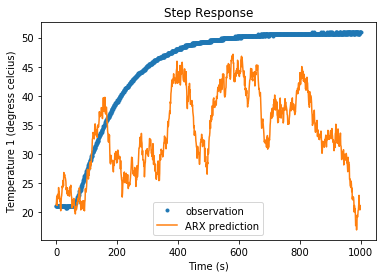

In [74]:
plt.plot(df.Time, df.T1, '.', label = 'observation')
plt.plot(t, y_armax, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Step Response")
plt.legend()
plt.show()

Not a very convincing fit.